# Exploratory Data Analysis

The data are from:

- Toxic Comment Classification Challenge ([link](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data))



## Load libraries and data

In [52]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

In [53]:
# Path to data
path_tox_com = Path("data", "raw", "toxic_comment_clf_challenge.csv")

# Load data
df_tox_com = pd.read_csv(path_tox_com)

# Explore dataset

In [54]:
print("Shape:", df_tox_com.shape)

Shape: (159571, 8)


In [55]:
print("\Columns:", df_tox_com.columns)

\Columns: Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [56]:
print("Missing Values:\n", df_tox_com.isnull().sum())

Missing Values:
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [57]:
df_tox_com.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [58]:
df_tox_com.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df_tox_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# Check distributions

In [60]:
def barpot_text(barplot: sns.barplot, above_top: int=300) -> None:
    """
    Add to a barplot the text with the count value on the top of each bar.
    """
    for p in barplot.patches:
        barplot.text(
            p.get_x() + p.get_width() / 2, # x = center of the bar
            p.get_height() + above_top, # y = above the top of the bar
            f"{p.get_height():.0f}", # text = height of the bar (i.e, counts)
            ha="center", # horizontal alignment
            va="center", # vertical alignment
            fontsize=12,
            color="red"
        )

In [61]:
column_categories = df_tox_com.columns.tolist()[2:]
print(column_categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


## Multi-label count

In [62]:
multi_label_count = pd.Series(df_tox_com[column_categories].sum(axis=1)).value_counts()
multi_label_count

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: count, dtype: int64

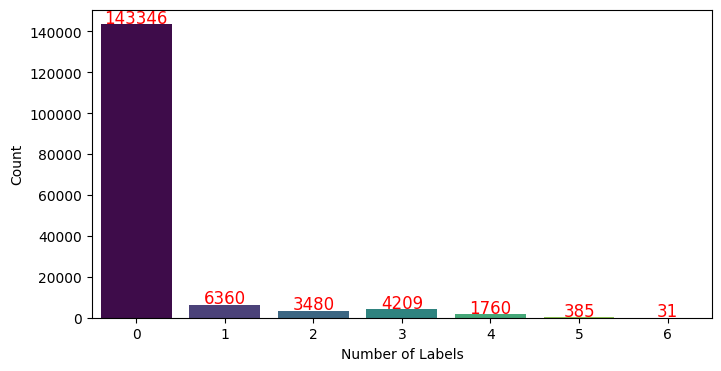

In [63]:
# Checking for multi-label comments
plt.figure(figsize=(8,4))
barplot = sns.barplot(
    y=multi_label_count.values, 
    x=multi_label_count.index,
    hue=multi_label_count.index,
    legend=False,
    palette="viridis"
    )
barpot_text(barplot, above_top=3100)
plt.xlabel("Number of Labels")
plt.ylabel("Count")
plt.show()

The vast majority of the data is not labeled toxic, that is all the labels are "0".

## Label count

In [64]:
train_label_counts = df_tox_com[column_categories].sum().sort_values()
train_label_counts

threat             478
identity_hate     1405
severe_toxic      1595
insult            7877
obscene           8449
toxic            15294
dtype: int64

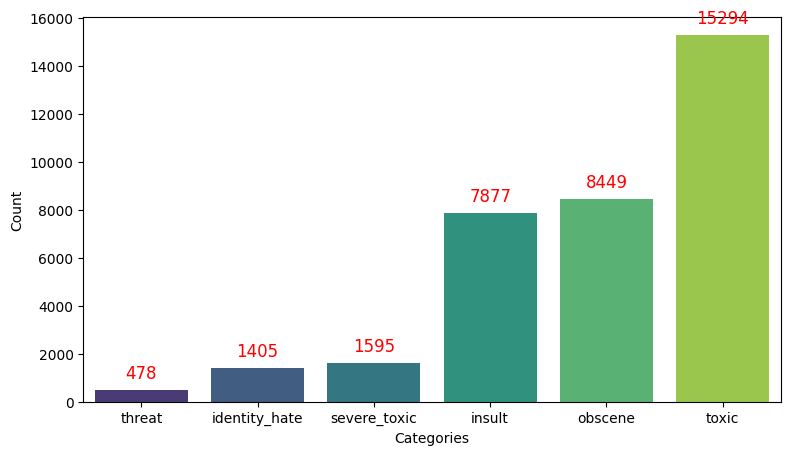

In [65]:
plt.figure(figsize=(9, 5))
barplot = sns.barplot(
    y=train_label_counts.values, 
    x=train_label_counts.index,
    hue=train_label_counts.index,
    legend=False,
    palette="viridis"
    )
barpot_text(barplot, above_top=700)
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show() 

## Plot single labels 

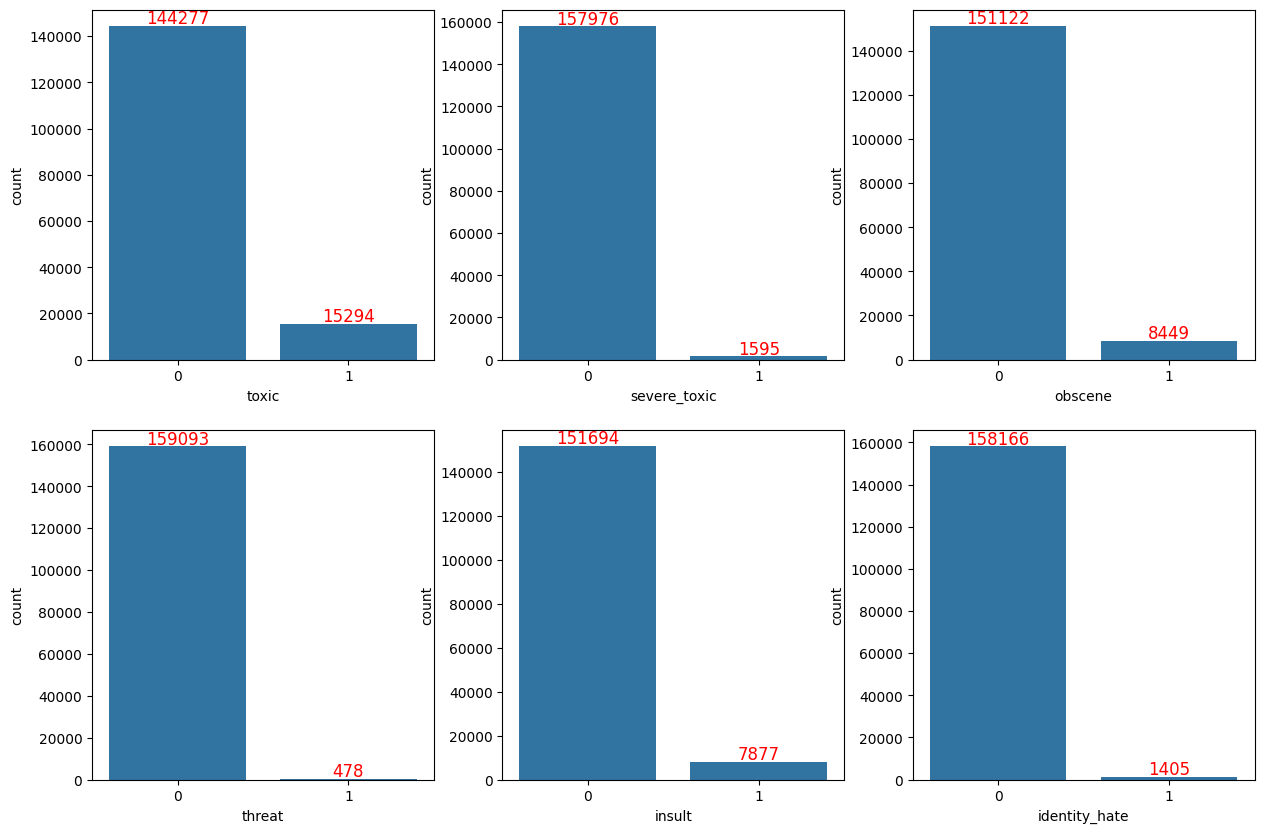

In [66]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
countplot = sns.countplot(x="toxic", data=df_tox_com)
barpot_text(countplot, 3500)

plt.subplot(2, 3, 2)
countplot = sns.countplot(x="severe_toxic", data=df_tox_com)
barpot_text(countplot, 3500)

plt.subplot(2, 3, 3)
countplot = sns.countplot(x="obscene", data=df_tox_com)
barpot_text(countplot, 3500)

plt.subplot(2, 3, 4)
countplot = sns.countplot(x="threat", data=df_tox_com)
barpot_text(countplot, 3500)

plt.subplot(2, 3, 5)
countplot = sns.countplot(x="insult", data=df_tox_com)
barpot_text(countplot, 3500)

plt.subplot(2, 3, 6)
countplot = sns.countplot(x="identity_hate", data=df_tox_com)
barpot_text(countplot, 3500)

plt.show()

## Comments length

In [67]:
comment_count = df_tox_com['comment_text'].str.len()
comment_count

0         264
1         112
2         233
3         622
4          67
         ... 
159566    295
159567     99
159568     81
159569    116
159570    189
Name: comment_text, Length: 159571, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

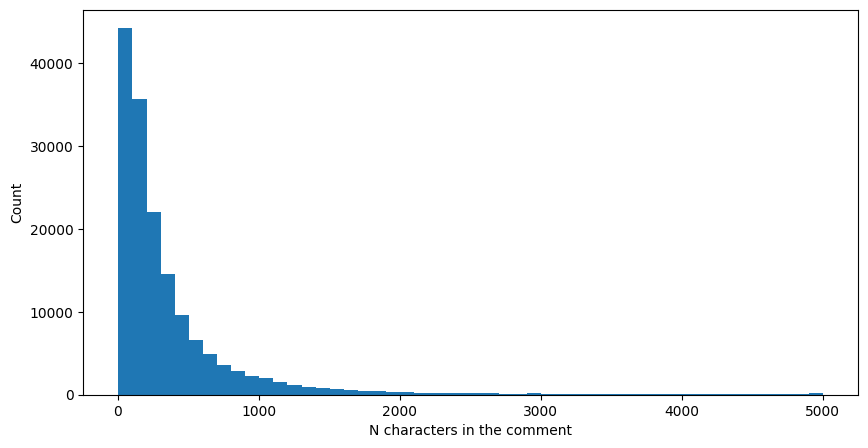

In [68]:
plt.figure(figsize=(10,5))
plt.hist(comment_count, bins=50)
plt.xlabel("N characters in the comment")
plt.ylabel("Count")
plt.show

In [69]:
print(f"Shortest comment has {comment_count.min()} characters")
print(f"Longest comment has {comment_count.max()} characters")

Shortest comment has 6 characters
Longest comment has 5000 characters


In [70]:
# Number of comments with 6 characters
print(len(df_tox_com["comment_text"][comment_count==6]))

2


In [71]:
# Number of comments with less than 20 characters
print(len(df_tox_com["comment_text"][comment_count<20]))

284


In [72]:
# Comments with less that 15 characters
print(df_tox_com["comment_text"][comment_count<15])

3638      September 2008
20594     September 2015
52442             14:53,
93586       {{unblock|yo
100706    hello cow head
101492     GONE FISHING.
109985          {{unbloc
118850          FUCK YOU
121074          you suck
137062            ~ J.Lo
141899    Unblock Please
150919      04:59, 22 Au
Name: comment_text, dtype: object


In [73]:
# Number of comments with 5000 characters
print(len(df_tox_com["comment_text"][comment_count==5000]))

42


In [74]:
# Longest comments (first one with 5000 characters)
print(df_tox_com["comment_text"][comment_count==5000].iloc[0])

ii CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST

# Correlation matrix

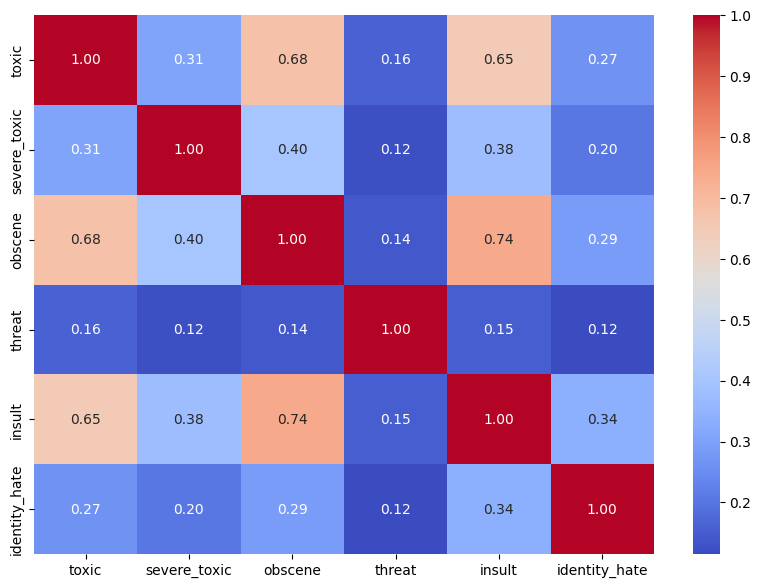

In [75]:
# Correlation matrix of labels
corr_matrix = df_tox_com[column_categories].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Word Cloud plots

In [76]:
df_only_toxic = df_tox_com[df_tox_com[column_categories].sum(axis=1) > 0]
df_no_toxic = df_tox_com[df_tox_com[column_categories].sum(axis=1) == 0]

In [77]:
df_tox_com["comment_text"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 159571 entries, 0 to 159570
Series name: comment_text
Non-Null Count   Dtype 
--------------   ----- 
159571 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [78]:
text_jointed_all = " ".join(df_tox_com["comment_text"])
text_jointed_only_toxic = " ".join(df_only_toxic["comment_text"])
text_jointed_no_toxic = " ".join(df_no_toxic["comment_text"])

In [79]:
wordcloud_all = WordCloud(
    width = 800,
    height = 800,
    background_color ='black',
    stopwords = STOPWORDS,
    min_font_size = 10).generate(text_jointed_all)

In [80]:
wordcloud_only_toxic = WordCloud(
    width = 800,
    height = 800,
    background_color ='black',
    stopwords = STOPWORDS,
    min_font_size = 10).generate(text_jointed_only_toxic)

In [81]:
wordcloud_no_toxic = WordCloud(
    width = 800,
    height = 800,
    background_color ='black',
    stopwords = STOPWORDS,
    min_font_size = 10).generate(text_jointed_no_toxic)

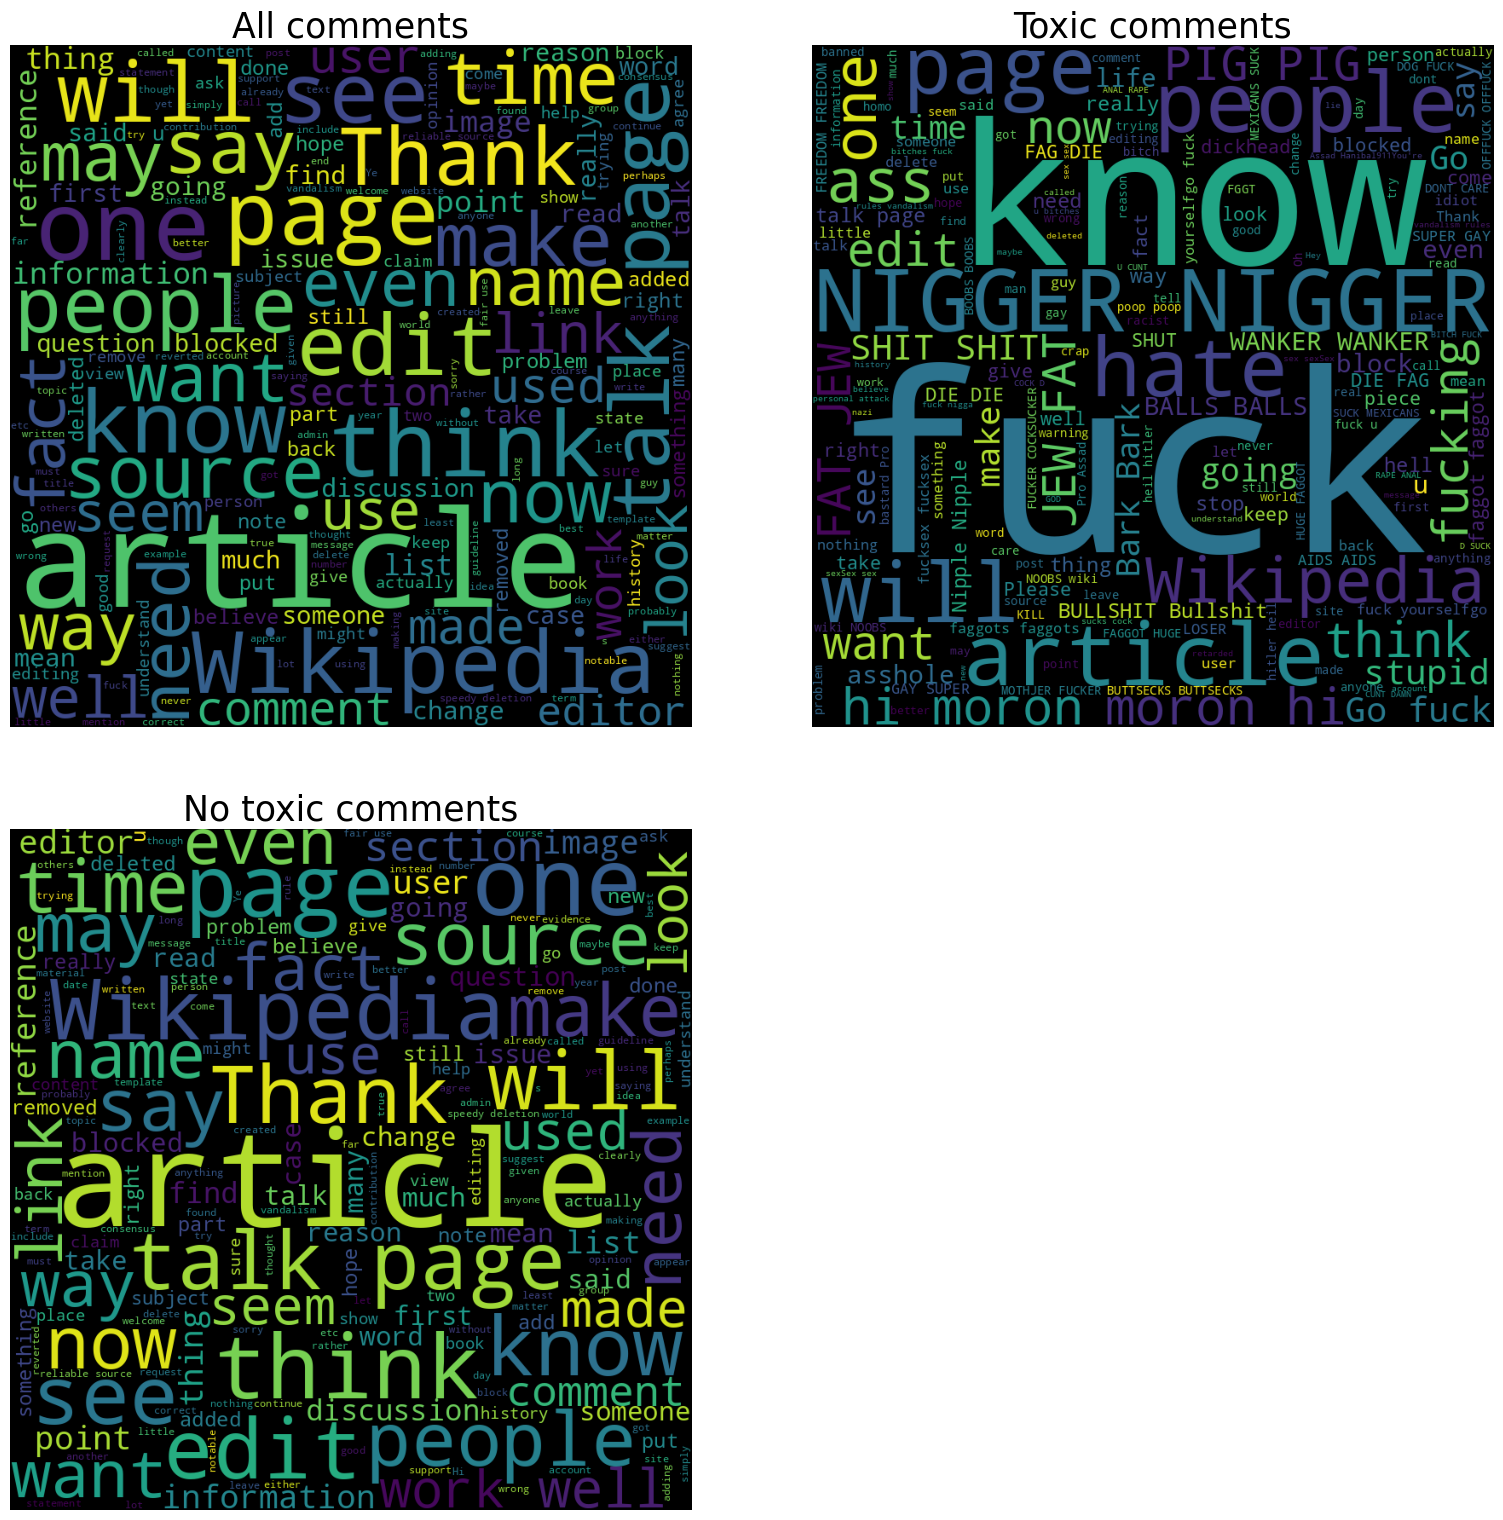

In [82]:
plt.figure(figsize = (15, 15), facecolor = None)

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_all)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("All comments", fontsize=25)
 
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_only_toxic)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Toxic comments", fontsize=25)

plt.subplot(2, 2, 3)
plt.imshow(wordcloud_no_toxic)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("No toxic comments", fontsize=25)

plt.subplots_adjust(wspace=0.15)
plt.subplots_adjust(hspace=0.15)
plt.show()

# split train-val-test set

In [83]:
df_tox_com

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [84]:
train_val_set, test_set = train_test_split(df_tox_com, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(train_val_set, test_size=0.2, random_state=42)

In [85]:
print(f"Shape original data set: {df_tox_com.shape}")
print(f"Shape train set: {train_set.shape}")
print(f"Shape val set:   {val_set.shape}")
print(f"Shape test set:  {test_set.shape}")

Shape original data set: (159571, 8)
Shape train set: (102124, 8)
Shape val set:   (25532, 8)
Shape test set:  (31915, 8)


In [86]:
train_set.to_csv(Path("data", "processed", "train.csv"))
val_set.to_csv(Path("data", "processed", "val.csv"))
test_set.to_csv(Path("data", "processed", "test.csv"))